In [20]:
import pandas as pd
import numpy as np

In [21]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

def import_data(file, **kwargs):
    """create a dataframe and optimize its memory usage"""
    try:
        df = pd.read_csv(file, parse_dates=True, keep_date_col=True, **kwargs)
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None
    df = reduce_mem_usage(df)
    return df

In [12]:
train_df = import_data("Datasets/train.csv", index_col="id", encoding='utf8')

C:\Users\Adrian\AppData\Local\Temp\ipykernel_21144\2759733698.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file, parse_dates=True, keep_date_col=True, **kwargs)


Memory usage of dataframe is 1053.30 MB
Memory usage after optimization is: 274.30 MB
Decreased by 74.0%


In [13]:
test_df = import_data("Datasets/test.csv", index_col="id", encoding="utf8")

C:\Users\Adrian\AppData\Local\Temp\ipykernel_21144\2759733698.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file, parse_dates=True, keep_date_col=True, **kwargs)


Memory usage of dataframe is 643.68 MB
Memory usage after optimization is: 175.55 MB
Decreased by 72.7%


In [14]:
train_df["Region_Code"] = train_df["Region_Code"].astype(np.int8)
test_df["Region_Code"] = test_df["Region_Code"].astype(np.int8)

train_df["Policy_Sales_Channel"] = train_df["Policy_Sales_Channel"].astype(np.int16)
test_df["Policy_Sales_Channel"] = test_df["Policy_Sales_Channel"].astype(np.int16)

In [19]:
# Get a comprehensive summary of training DataFrame
train_df.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,11504798,11504798,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,6228134,NaN,NaN,NaN,NaN,5982678,5783229,NaN,NaN,NaN,NaN
mean,NaN,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,NaN,NaN,3.046136e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,NaN,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,NaN,NaN,1.645474e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,NaN,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,NaN,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,NaN,NaN,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,NaN,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,NaN,NaN,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,NaN,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,NaN,NaN,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669866 entries, 11504798 to 19174663
Data columns (total 10 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Gender                category
 1   Age                   int8    
 2   Driving_License       int8    
 3   Region_Code           int8    
 4   Previously_Insured    int8    
 5   Vehicle_Age           category
 6   Vehicle_Damage        category
 7   Annual_Premium        float32 
 8   Policy_Sales_Channel  int16   
 9   Vintage               int16   
dtypes: category(3), float32(1), int16(2), int8(4)
memory usage: 168.2 MB


In [30]:
# This variable defines the target column for prediction
TARGET = "Response"

In [22]:
# Obtain the features of testing dataset
initial_features = test_df.columns.to_list()
print(initial_features)

['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [23]:
categorical_features = [col for col in initial_features if pd.concat([train_df[col], test_df[col]]).nunique() < 10]

print(categorical_features)

['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']


In [24]:
numerical_features = list(set(initial_features) - set(categorical_features))
print(numerical_features)

['Region_Code', 'Policy_Sales_Channel', 'Annual_Premium', 'Age', 'Vintage']


In [25]:
train_df[categorical_features] = train_df[categorical_features].astype("category")
test_df[categorical_features] = test_df[categorical_features].astype("category")

In [26]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11504798.0,38.383563,14.993459,20.0,24.0,36.0,49.0,85.0
Region_Code,11504798.0,26.418690,12.991590,0.0,15.0,28.0,35.0,52.0
Annual_Premium,11504798.0,30461.359375,16454.744141,2630.0,25277.0,31824.0,39451.0,540165.0
Policy_Sales_Channel,11504798.0,112.425442,54.035708,1.0,29.0,151.0,152.0,163.0
Vintage,11504798.0,163.897744,79.979531,10.0,99.0,166.0,232.0,299.0
Response,11504798.0,0.122997,0.328434,0.0,0.0,0.0,0.0,1.0


In [27]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7669866.0,38.391369,14.999507,20.0,24.0,36.0,49.0,85.0
Region_Code,7669866.0,26.426614,12.994326,0.0,15.0,28.0,35.0,52.0
Annual_Premium,7669866.0,30465.523438,16445.865234,2630.0,25280.0,31827.0,39460.0,540165.0
Policy_Sales_Channel,7669866.0,112.364992,54.073585,1.0,29.0,151.0,152.0,163.0
Vintage,7669866.0,163.899577,79.984449,10.0,99.0,166.0,232.0,299.0


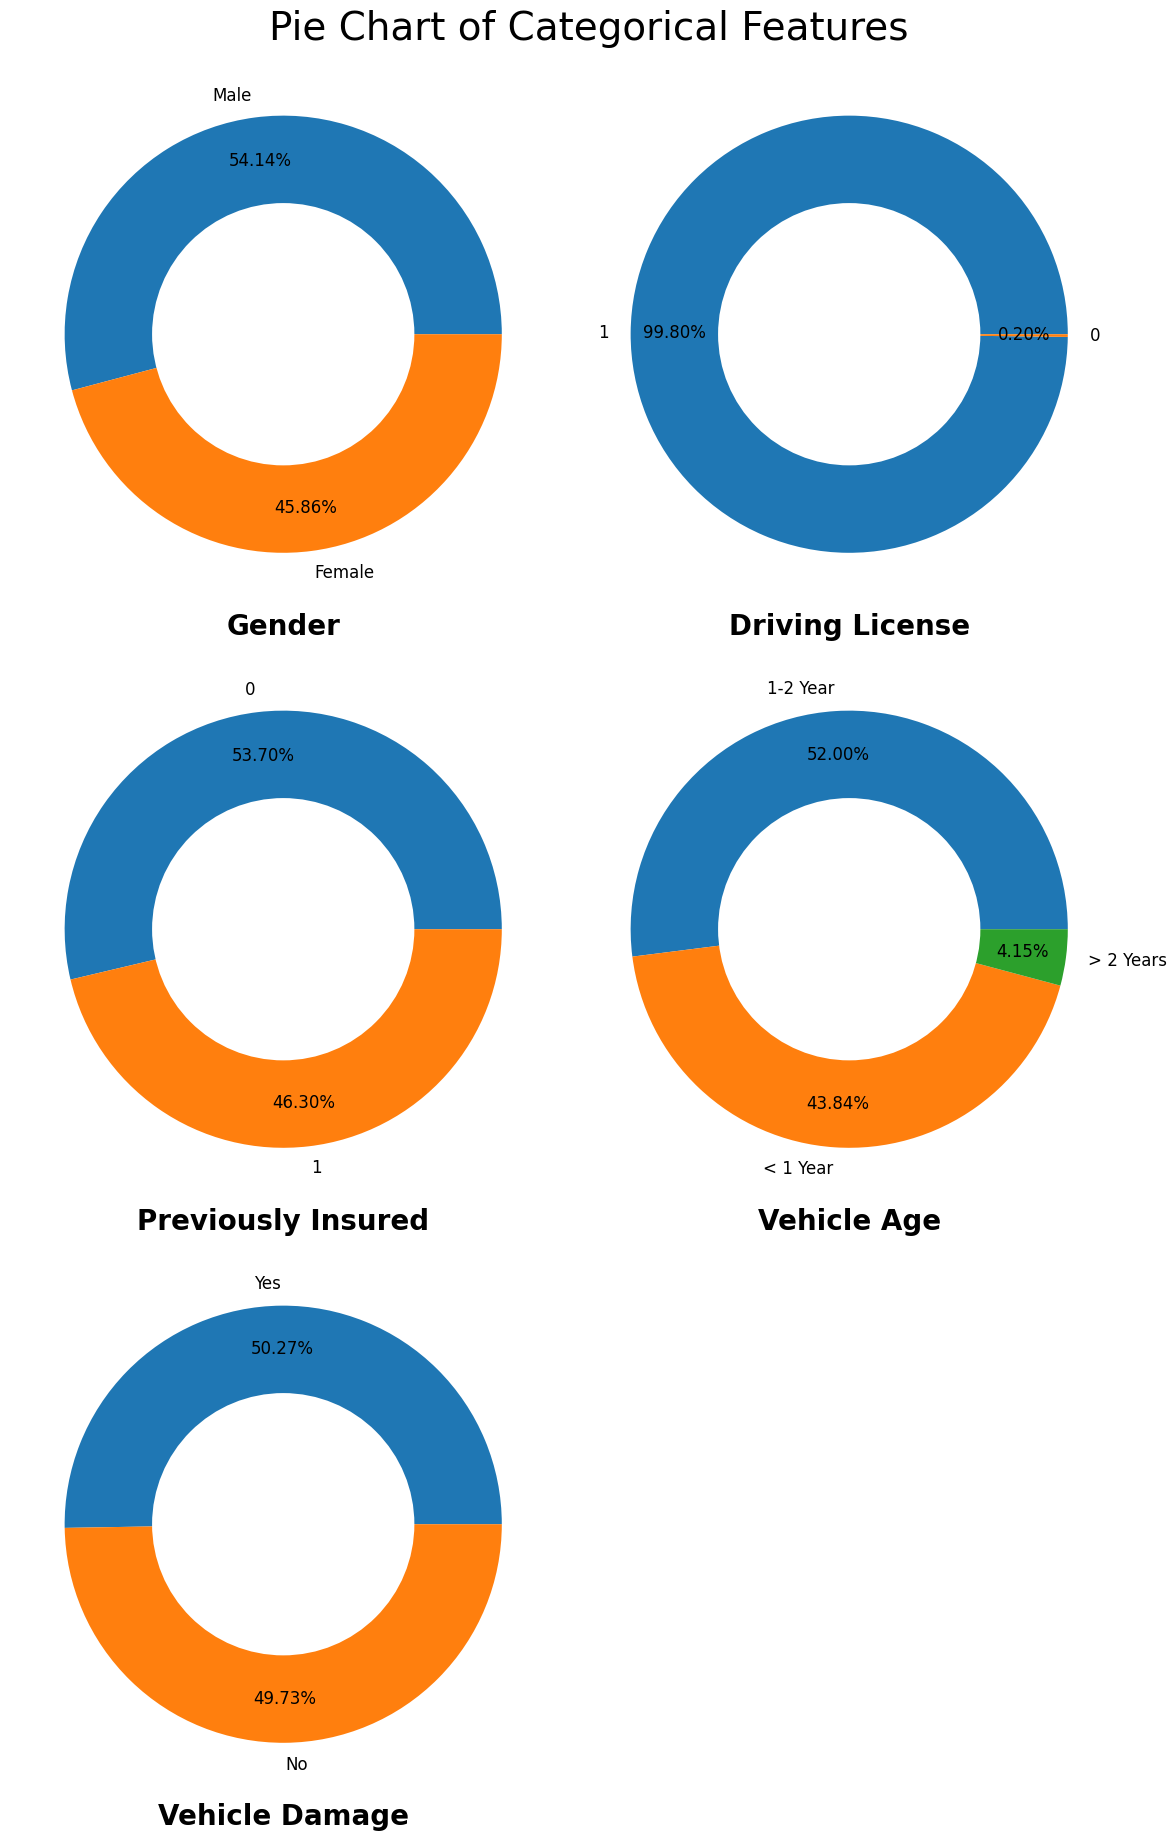

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 18))

for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    train_df[col].value_counts().plot(kind='pie',autopct='%.2f%%',pctdistance=0.8,fontsize=12)
    plt.gca().add_artist(plt.Circle((0,0),radius=0.6,fc='white'))
    plt.xlabel(' '.join(col.split('_')), weight='bold', size=20)
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Pie Chart of Categorical Features", size=28, y=1.02)
plt.show()

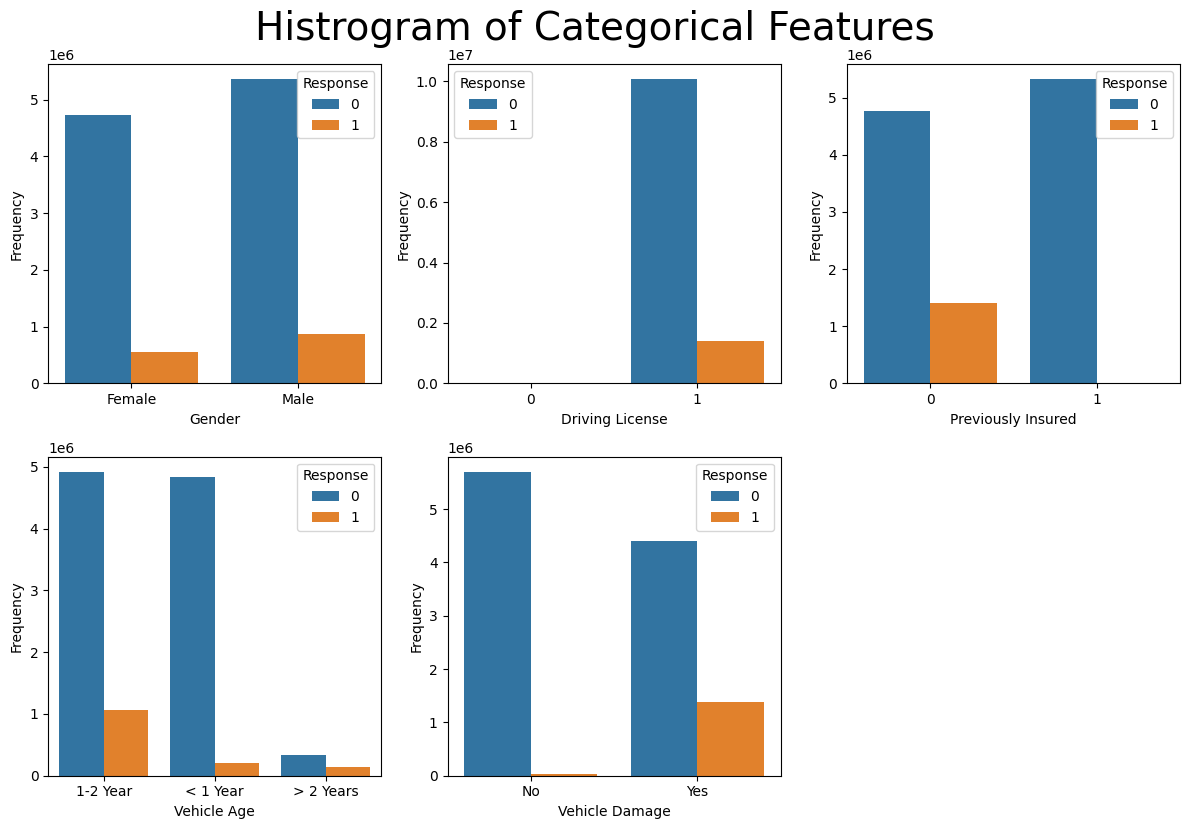

In [31]:
import seaborn as sns
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=train_df[col], hue=train_df[TARGET])
    plt.xlabel(' '.join(col.split('_')))
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Histogram of Categorical Features", size=28, y=1.03)
plt.show()

In [32]:
def encoder(df):
    gender_map = {
        'Female': 0,
        'Male': 1
    }

    vehicle_age_map = {
        '< 1 Year': 0,
        '1-2 Year': 1,
        '> 2 Years': 2
    }

    vehicle_damage_map = {
        'No': 0,
        'Yes': 1
    }

    df['Gender'] = df['Gender'].map(gender_map).astype(np.int8)
    df['Driving_License'] = df['Driving_License'].astype(np.int8)
    df['Previously_Insured'] = df['Previously_Insured'].astype(np.int8)
    df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age_map).astype(np.int8)
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map(vehicle_damage_map).astype(np.int8)

    return df

In [33]:
train_copy = train_df.copy()
train_copy = encoder(train_copy)

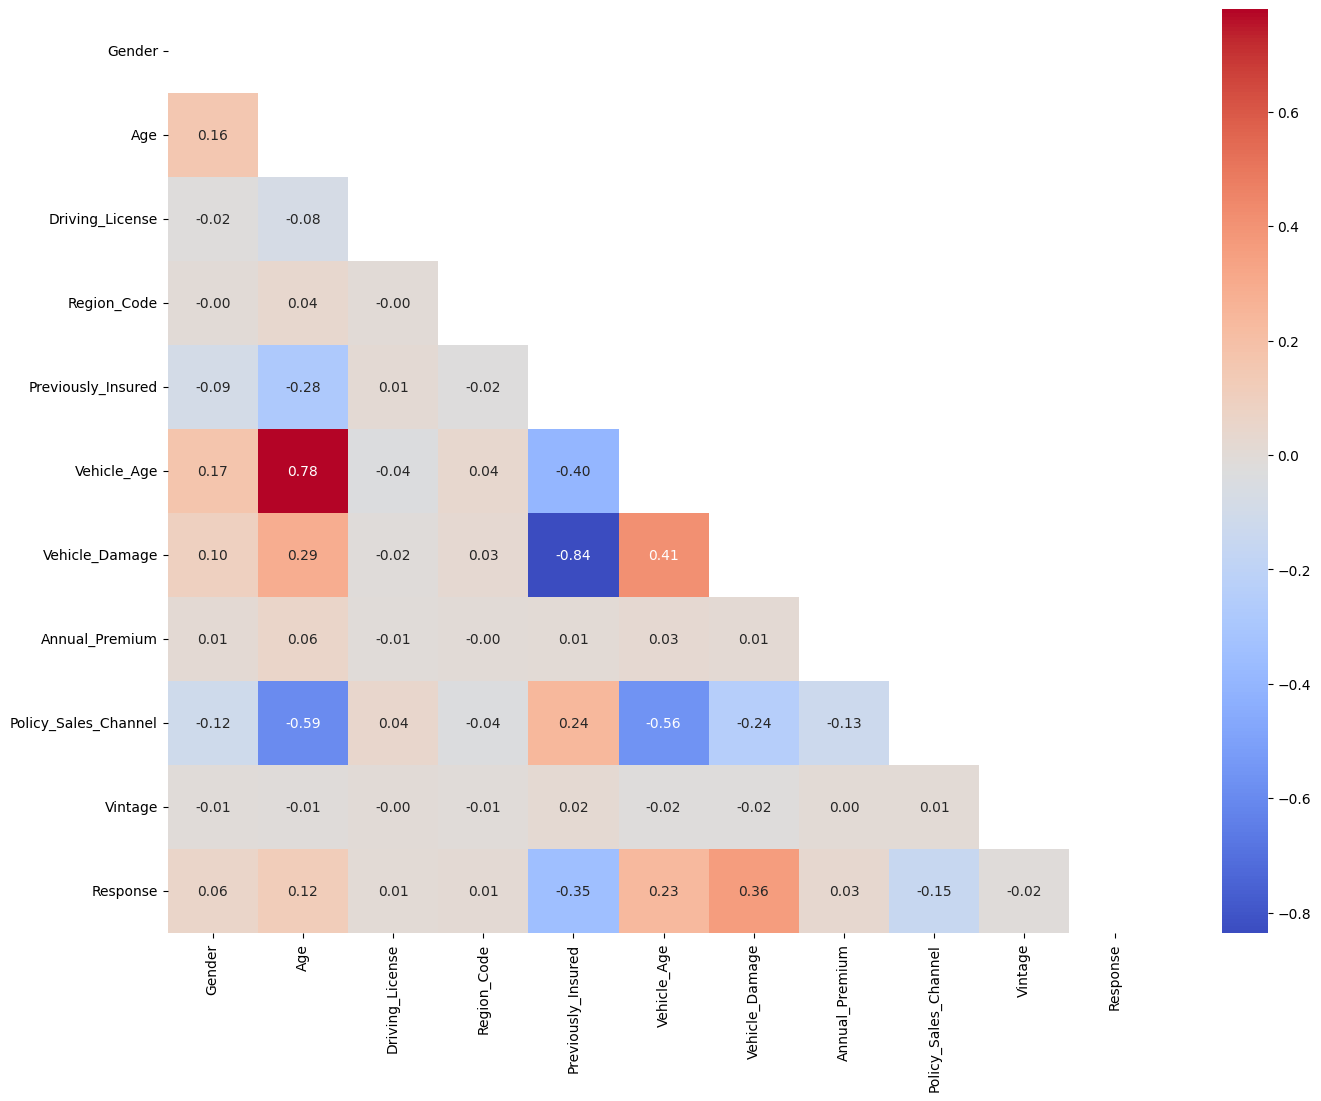

In [34]:
cor_mat = train_copy.corr(method="pearson")
mask = np.triu(np.ones_like(cor_mat))

plt.figure(figsize=(16, 12))
sns.heatmap(cor_mat, cmap='coolwarm', fmt='.2f', annot=True, mask=mask)
plt.show()

In [35]:
X = train_df.drop(TARGET, axis=1)
y = train_df[TARGET]

In [39]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report

import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import gc

In [37]:
skfold = StratifiedKFold(5, shuffle=True, random_state=42)

In [41]:
xgb_params = {
     'eval_metric': 'auc',
     'n_estimators': 3000,
     'eta': 0.05,
     'alpha':  0.2545607592482198,
     'subsample': 0.8388163485383147,
     'colsample_bytree': 0.2732499701466825,
     'max_depth': 16,
     'min_child_weight': 5,
     'gamma': 0.0017688666476104672,
     'max_bin': 262143,
     'tree_method': 'hist',
     'device': 'cuda',
     'enable_categorical': True,
     'early_stopping_rounds': 50,
}

In [42]:
oof_preds = []
oof_aucs = []


for fold, (train_idx, test_idx) in enumerate(skfold.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_test, y_test = X.iloc[test_idx], y[test_idx]

    xgb_clf = xgb.XGBClassifier(**xgb_params)
    xgb_clf = xgb_clf.fit(X_train, y_train,
                           eval_set=[(X_test, y_test)],
                           verbose=500)

    booster = xgb_clf.get_booster()
    test_pred = booster.predict(xgb.DMatrix(test_df, enable_categorical=True),
                                 iteration_range=(0, xgb_clf.best_iteration + 1))
    auc = xgb_clf.best_score
    oof_aucs.append(auc)
    oof_preds.append(test_pred)
    print(f"\n---- Fold {fold}: ROC-AUC Score: {auc:.6f}\n")

    del X_train, y_train, X_test, y_test
    gc.collect()

auc_mean = np.mean(oof_aucs)
auc_std = np.std(oof_aucs)
print(f"\n---> ROC-AUC Score: {auc_mean:.6f} \xB1 {auc_std:.6f}\n")

test_pred_xgb = np.mean(oof_preds, axis=0)

[0]	validation_0-auc:0.80991
[500]	validation_0-auc:0.88809
[1000]	validation_0-auc:0.88995
[1500]	validation_0-auc:0.89087
[2000]	validation_0-auc:0.89129
[2500]	validation_0-auc:0.89155
[2717]	validation_0-auc:0.89164

---- Fold 0: ROC-AUC Score: 0.891651

[0]	validation_0-auc:0.80965
[500]	validation_0-auc:0.88791
[1000]	validation_0-auc:0.88972
[1500]	validation_0-auc:0.89057
[2000]	validation_0-auc:0.89100
[2477]	validation_0-auc:0.89119

---- Fold 1: ROC-AUC Score: 0.891195

[0]	validation_0-auc:0.80979
[500]	validation_0-auc:0.88812
[1000]	validation_0-auc:0.88992
[1500]	validation_0-auc:0.89069
[2000]	validation_0-auc:0.89107
[2215]	validation_0-auc:0.89115

---- Fold 2: ROC-AUC Score: 0.891155

[0]	validation_0-auc:0.80968
[500]	validation_0-auc:0.88777
[1000]	validation_0-auc:0.88959
[1500]	validation_0-auc:0.89049
[2000]	validation_0-auc:0.89090
[2500]	validation_0-auc:0.89115
[2812]	validation_0-auc:0.89129

---- Fold 3: ROC-AUC Score: 0.891322

[0]	validation_0-auc:0.81007

In [43]:
test_pred_xgb

array([3.7626326e-03, 5.7265723e-01, 2.5807685e-01, ..., 2.3969368e-04,
       6.2277174e-01, 1.0238551e-04], dtype=float32)